# Importación de datos

In [2]:
import pandas as pd

In [35]:
data = pd.read_csv("data/incidentes-viales-c5-2017.csv")
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,C5/170622/06952,22/06/2017,20:34:45,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,20:39:42,MILPA ALTA,accidente-choque sin lesionados,19.20137,-99.00732,EMERGENCIA,LLAMADA DEL 911,MILPA ALTA,"19.20137004,-99.00731988",6
1,C5/170622/05115,22/06/2017,16:41:14,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,16:46:02,TLAHUAC,accidente-choque sin lesionados,19.29659,-99.03443,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,"19.29659004,-99.03443004",6
2,C5/170622/03715,22/06/2017,13:44:52,Jueves,(N) La unidad de atención a emergencias fue de...,22/06/2017,2017,Junio,16:48:07,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.43053002,-99.05259996",6
3,C5/170622/05317,22/06/2017,17:08:58,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:20:34,IZTAPALAPA,accidente-choque con lesionados,19.36189,-99.12243,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36188999,-99.12242988",6
4,C5/170622/05348,22/06/2017,17:12:38,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:25:27,IZTAPALAPA,accidente-choque con lesionados,19.36168,-99.12210,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36168002,-99.12210012",6


In [36]:
years = ["2018", "2019", "2021"]
for y in years:
    df = pd.read_csv(f"data/incidentes-viales-c5-{y}.csv")
    data = pd.concat([data, df], axis=0, ignore_index=True)

# Análisis exploratorio

In [ ]:
data.head()

In [ ]:
data.tail()

In [37]:
data.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre           float64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
Unnamed: 0           float64
ano                  float64
dtype: object

Cambiar:  
* Fecha de creacion -> fecha
* Hora de creación 
* codigo de cierre -> categorico
* Fecha de cierre -> fecha
* año de cierre -> eliminar
* mes de cierre -> eliminar
* Hora de cierre ->  tiempo
* Delegación -> Categorico
* incidente_c4 -> Categorico
* clas_con_f_alarma -> Categorico
* tipo_entrada -> Categorico
* delegacion_cierre -> categorico
* geopoint -> eliminar
* mes -> categorica
* unnamed -> eliminar


# Limpieza

In [38]:
data['fecha_hora_cierre'] = pd.to_datetime(data['fecha_cierre']+ " " + data['hora_cierre'])

In [39]:
data['fecha_hora_creacion'] = pd.to_datetime(data['fecha_creacion']+ " " + data['hora_creacion'])

In [40]:
data.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes', 'Unnamed: 0', 'ano', 'fecha_hora_cierre',
       'fecha_hora_creacion'],
      dtype='object')

In [49]:
data.drop(columns=['dia_semana', 'año_cierre', 'mes_cierre','fecha_cierre', 'fecha_creacion', 'hora_cierre', 'hora_creacion', 'Unnamed: 0', 'ano', "geopoint"], inplace=True)

In [51]:
# Borrar columnas 
diccionario_de_conversion = {
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]'
}

In [52]:
dt = data.astype(diccionario_de_conversion)

In [53]:
dt.dtypes

folio                          object
codigo_cierre                  object
delegacion_inicio              object
incidente_c4                   object
latitud                       float64
longitud                      float64
clas_con_f_alarma              object
tipo_entrada                   object
delegacion_cierre              object
geopoint                       object
mes                             int64
fecha_hora_cierre      datetime64[ns]
fecha_hora_creacion    datetime64[ns]
dtype: object

In [54]:
dt.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,fecha_hora_cierre,fecha_hora_creacion
0,C5/170622/06952,(D) El incidente reportado se registró en dos ...,MILPA ALTA,accidente-choque sin lesionados,19.20137,-99.00732,EMERGENCIA,LLAMADA DEL 911,MILPA ALTA,"19.20137004,-99.00731988",6,2017-06-22 20:39:42,2017-06-22 20:34:45
1,C5/170622/05115,(D) El incidente reportado se registró en dos ...,TLAHUAC,accidente-choque sin lesionados,19.29659,-99.03443,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,"19.29659004,-99.03443004",6,2017-06-22 16:46:02,2017-06-22 16:41:14
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.43053002,-99.05259996",6,2017-06-22 16:48:07,2017-06-22 13:44:52
3,C5/170622/05317,(D) El incidente reportado se registró en dos ...,IZTAPALAPA,accidente-choque con lesionados,19.36189,-99.12243,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36188999,-99.12242988",6,2017-06-22 17:20:34,2017-06-22 17:08:58
4,C5/170622/05348,(D) El incidente reportado se registró en dos ...,IZTAPALAPA,accidente-choque con lesionados,19.36168,-99.12210,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36168002,-99.12210012",6,2017-06-22 17:25:27,2017-06-22 17:12:38


In [55]:
dt.isnull().sum()

folio                      0
codigo_cierre              0
delegacion_inicio         59
incidente_c4               0
latitud                  443
longitud                 435
clas_con_f_alarma          0
tipo_entrada               0
delegacion_cierre         41
geopoint               13393
mes                        0
fecha_hora_cierre          2
fecha_hora_creacion        0
dtype: int64

<AxesSubplot:>

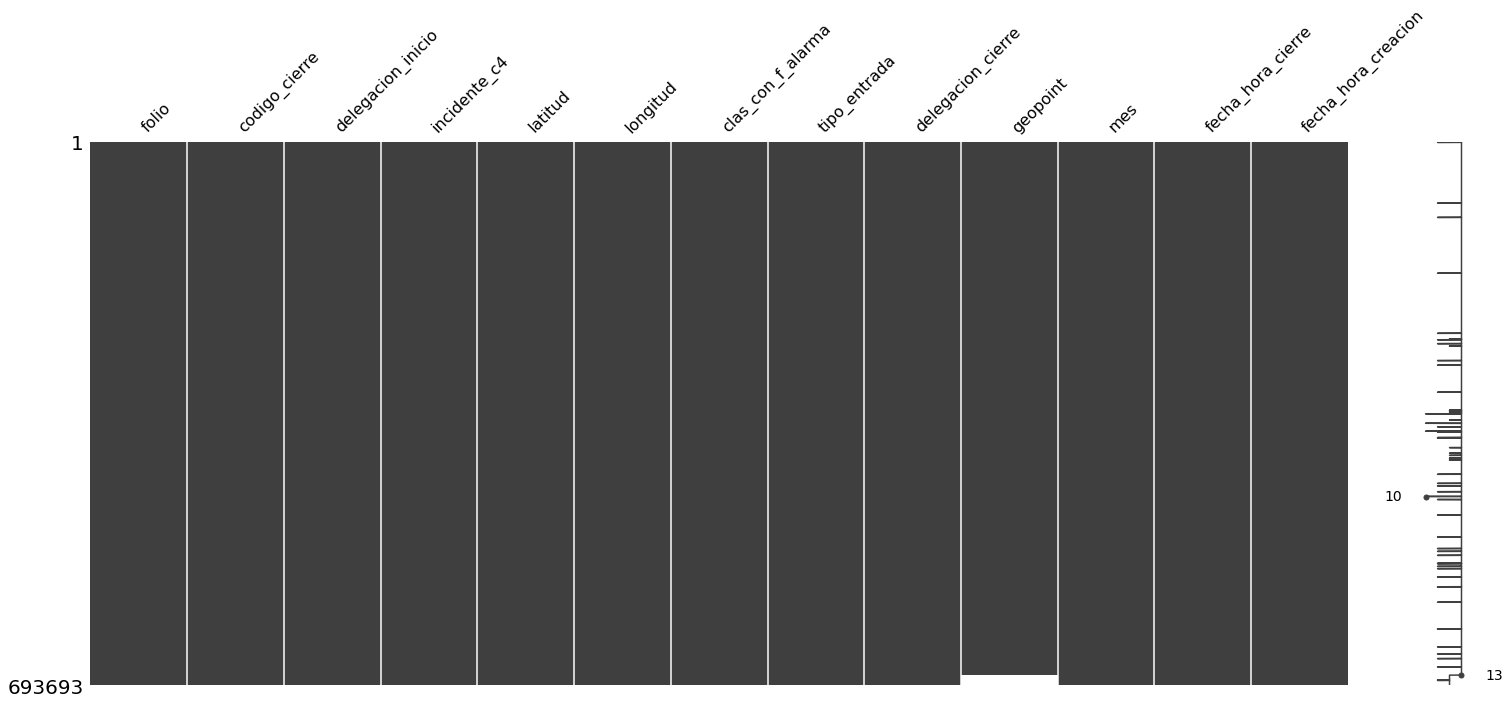

In [62]:
import missingno as msno
msno.matrix(dt)

In [63]:
dt.drop(columns=["geopoint"], inplace = True)

In [65]:
dt.dropna(inplace = True)

In [66]:
dt.isnull().sum()

folio                  0
codigo_cierre          0
delegacion_inicio      0
incidente_c4           0
latitud                0
longitud               0
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre      0
mes                    0
fecha_hora_cierre      0
fecha_hora_creacion    0
dtype: int64

In [57]:
dt["codigo_cierre"].unique()

array(['(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento',
       'D', 'A', 'N', 'F', 'I'], dtype=object)

In [61]:
dt[dt['codigo_cierre'].str.contains("D", regex=True)]

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,fecha_hora_cierre,fecha_hora_creacion
0,C5/170622/06952,(D) El incidente reportado se registró en dos ...,MILPA ALTA,accidente-choque sin lesionados,19.20137,-99.00732,EMERGENCIA,LLAMADA DEL 911,MILPA ALTA,"19.20137004,-99.00731988",6,2017-06-22 20:39:42,2017-06-22 20:34:45
1,C5/170622/05115,(D) El incidente reportado se registró en dos ...,TLAHUAC,accidente-choque sin lesionados,19.29659,-99.03443,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,"19.29659004,-99.03443004",6,2017-06-22 16:46:02,2017-06-22 16:41:14
3,C5/170622/05317,(D) El incidente reportado se registró en dos ...,IZTAPALAPA,accidente-choque con lesionados,19.36189,-99.12243,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36188999,-99.12242988",6,2017-06-22 17:20:34,2017-06-22 17:08:58
4,C5/170622/05348,(D) El incidente reportado se registró en dos ...,IZTAPALAPA,accidente-choque con lesionados,19.36168,-99.12210,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36168002,-99.12210012",6,2017-06-22 17:25:27,2017-06-22 17:12:38
6,C5/170622/03505,(D) El incidente reportado se registró en dos ...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.39240,-99.23910,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.3924,-99.2391",6,2017-06-22 13:43:48,2017-06-22 13:14:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693684,C5/210228/09247,D,ALVARO OBREGON,accidente-choque sin lesionados,19.32522,-99.21411,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,NaN,2,2021-02-28 22:29:18,2021-02-28 22:26:34
693685,C5/210228/09249,D,MIGUEL HIDALGO,accidente-choque con lesionados,19.39484,-99.23953,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,NaN,2,2021-02-28 22:35:06,2021-02-28 22:27:30
693686,C5/210228/09250,D,ALVARO OBREGON,accidente-choque sin lesionados,19.39965,-99.19095,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,NaN,2,2021-02-28 22:30:01,2021-02-28 22:27:35
693687,C5/210228/09255,D,IZTACALCO,accidente-choque con lesionados,19.39508,-99.05895,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTACALCO,NaN,2,2021-02-28 22:39:44,2021-02-28 22:28:35


In [23]:
df[df["fecha_creacion"].dt.year]

AttributeError: Can only use .dt accessor with datetimelike values